[*********************100%***********************]  1 of 1 completed

NVIDIA stock sample mean: $31.72555404424261
NVIDIA stock sample standard deviation: $29.642195547777888


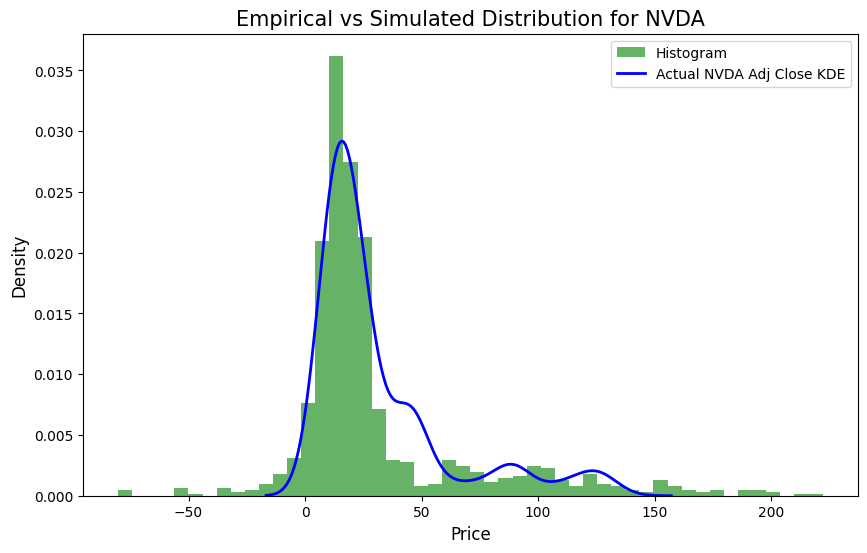

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)

stock_symbol = "NVDA"
stocks = yf.download(stock_symbol, start=start_date, end=end_date)
X = stocks['Adj Close'].values
mu = np.mean(X)
se = np.std(X)
print(f"NVIDIA stock sample mean: ${mu}")
print(f"NVIDIA stock sample standard deviation: ${se}")

# Given parameters
mu_1 = 16  
sigma1 = 8
mu_2 = 65 
sigma2 = 60
p = 0.7     
T = 1000

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0, 1)
    eps2 = np.random.normal(0, 1)
    r1 = mu_1 + sigma1 * eps1 
    r2 = mu_2 + sigma2 * eps2  
    u = np.random.uniform(0, 1)
    r[t] = r1 * (u <= p) + r2 * (u > p)  

# Plotting the histogram of r
plt.figure(figsize=(10,6))
plt.hist(r, bins=50, density=True, alpha=0.6, color='green', label="Histogram")

# Overlaying the distribution using seaborn kdeplot
sns.kdeplot(data=X, color='blue', label='Actual NVDA Adj Close KDE', lw=2)

# Adding plot labels and legend
plt.title(f'Empirical vs Simulated Distribution for {stock_symbol}', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
